In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import eli5
from eli5.sklearn import PermutationImportance
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fruad-detection/Fraud.csv


In [77]:
data = pd.read_csv("/kaggle/input/fruad-detection/Fraud.csv")

In [78]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [79]:
data.shape

(6362620, 11)

In [80]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [81]:
data.duplicated().sum()

0

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [83]:
data1 = data[data["isFraud"]==1]
data0 = data[data["isFraud"]==0][:8213]

In [84]:
new_data = pd.concat([data0, data1], axis=0)

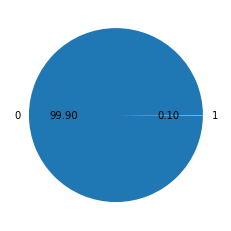

In [85]:
plt.pie(new_data["isFlaggedFraud"].value_counts(), labels=new_data["isFlaggedFraud"].unique(), autopct="%.2f")
plt.show()

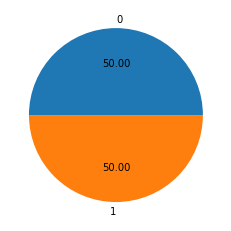

In [86]:
plt.pie(new_data["isFraud"].value_counts(), labels=new_data["isFraud"].unique(), autopct="%.2f")
plt.show()

In [87]:
data["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [88]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16426 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            16426 non-null  int64  
 1   type            16426 non-null  object 
 2   amount          16426 non-null  float64
 3   nameOrig        16426 non-null  object 
 4   oldbalanceOrg   16426 non-null  float64
 5   newbalanceOrig  16426 non-null  float64
 6   nameDest        16426 non-null  object 
 7   oldbalanceDest  16426 non-null  float64
 8   newbalanceDest  16426 non-null  float64
 9   isFraud         16426 non-null  int64  
 10  isFlaggedFraud  16426 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 1.5+ MB


In [89]:
new_data.drop(columns=["step","nameDest","nameOrig","isFlaggedFraud"], inplace=True)

In [90]:
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,3,9839.64,170136.0,160296.36,0.0,0.0
1,3,1864.28,21249.0,19384.72,0.0,0.0
4,3,11668.14,41554.0,29885.86,0.0,0.0
5,3,7817.71,53860.0,46042.29,0.0,0.0
6,3,7107.77,183195.0,176087.23,0.0,0.0


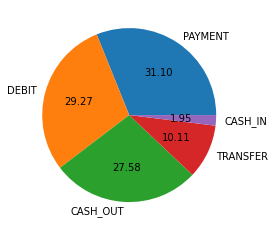

In [91]:
plt.pie(new_data["type"].value_counts(), labels=new_data["type"].unique(), autopct="%.2f")
plt.show()

In [92]:
new_data["type"].value_counts()

CASH_OUT    5108
TRANSFER    4808
PAYMENT     4530
CASH_IN     1660
DEBIT        320
Name: type, dtype: int64

In [93]:
lb = LabelEncoder()
new_data["type"] = lb.fit_transform(new_data["type"])


In [94]:
X = new_data.iloc[:,:-1]
y = new_data.iloc[:,-1]

In [95]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [96]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)


RandomForestClassifier()

In [97]:
perm = PermutationImportance(model, random_state=42)
perm.fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.to_list())

Weight,Feature
0.1770 ± 0.0140,oldbalanceOrg
0.1541 ± 0.0048,newbalanceOrig
0.1451 ± 0.0054,type
0.0928 ± 0.0015,oldbalanceDest
0.0531 ± 0.0041,newbalanceDest
0.0481 ± 0.0036,amount


All Columns are important


In [98]:
ypred = model.predict(X_test)

In [99]:
print("The Accuracy is :",accuracy_score(ypred, y_test))

The Accuracy is : 0.9957572403615569


In [100]:
print(confusion_matrix(ypred, y_test), " ---- Confusion Matrix")

[[2719   10]
 [  13 2679]]  ---- Confusion Matrix


In [101]:
import seaborn as sns

<AxesSubplot:>

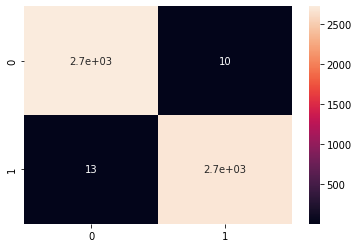

In [102]:
sns.heatmap(confusion_matrix(ypred, y_test), annot=True)

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
kn = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)

In [105]:
ypred2 = kn.predict(X_test)

In [106]:
print("The Accuracy is :",accuracy_score(ypred2, y_test))

The Accuracy is : 0.971591957203468


<AxesSubplot:>

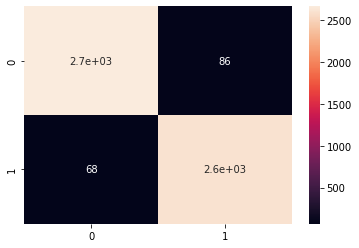

In [107]:
sns.heatmap(confusion_matrix(ypred2, y_test), annot=True)